# NLP Application with ML

## Classification of Tweets Data

### The Data

🔑 Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.metrics import f1_score
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package wordnet to /Users/serdar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Notebook Settings

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_colwidth', None)

# sns.set_context(context='talk', font_scale=1, rc={'figure.figsize':(11.7,8.27)})
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Getting Data

In [4]:
# For Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clarusway_NLP/Clarusway/clarusway-ds-students-7-21-main/3- Classes_Labs/NLP/NLP-1/airline_tweets.csv')
df = pd.read_csv("airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
plt.figure(figsize=(20,7))
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment")
for c in ax.containers:
    labels = [f'{h} - {h/df.airline.count()*100:0.2f}%' if (h:=v.get_height()) >= 0 else '' for v in c]
    ax.bar_label(c, labels=labels, fontsize=10, rotation=60)
ax.legend(loc='upper left');

In [ ]:
plt.figure(figsize=(22,7))
ax = sns.countplot(data = df, x ="negativereason")
for c in ax.containers:
    labels = [f'{h} - {h/df.negativereason.count()*100:0.2f}%' if (h:=v.get_height()) >= 0 else '' for v in c]
    ax.bar_label(c, labels=labels, fontsize=10, rotation=0)
    plt.xticks(rotation =20);

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = df, x ="airline_sentiment")
for c in ax.containers:
    labels = [f'{h} - {h/df.airline_sentiment.count()*100:0.2f}%' if (h:=v.get_height()) >= 0 else '' for v in c]
    ax.bar_label(c, labels=labels, fontsize=10, rotation=0)

## Cleaning Data

In [9]:
df2 = df.copy()

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/serdar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/serdar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/serdar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/serdar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
stop_words = stopwords.words('english')
words_to_exclude_from_stopwords = ['not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", "don't", 'hadn', 
                                   "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 
                                   'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
                                   "won't", 'wouldn', "wouldn't"]

new_stopwords = [w for w in stop_words if w not in words_to_exclude_from_stopwords]

In [12]:
def cleaning(data):

    import re
    
    #1. Removing URLS
    data = re.sub(r'http\S+', '', data)

    #2. Removing Tags
    data = re.sub(r'#\w+', '', data)

    #3. Removing Mentions
    data = re.sub(r'@\w+', '', data)

    #4. Contractions Expension & Tokenize
    #text_tokens = word_tokenize(contractions.fix(data.lower())) 
    text_tokens = word_tokenize(data.replace("'", '').lower())

    # #5. Removing mentions
    tokens_without_mention = [w for w in text_tokens if not w.startswith('@')]
    
    #6. Remove Puncs
    tokens_without_punc = [w for w in tokens_without_mention if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in new_stopwords]
    
    #8. lemma
    text_cleaned  = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [13]:
words = pd.Series(" ".join(df["text"]).split()).value_counts()
words

to                        8535
the                       5781
I                         5054
a                         4359
for                       3921
                          ... 
restrooms                    1
2244                         1
ski/bootbag                  1
http://t.co/IH5w9nfKz2       1
@ubergizmo                   1
Length: 30105, dtype: int64

In [14]:
df2["cleaned_text"] = df2["text"].apply(cleaning)
df2[['text', 'cleaned_text']]

,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,didnt today must mean need take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guest face amp little recourse
4,@VirginAmerica and it's a really big bad thing about it,really big bad thing
...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving minute late flight warning communication minute late flight thats called shitty customer svc
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,please bring american airline
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",money change flight dont answer phone suggestion make commitment


## Features and Label

In [15]:
df2.rename(columns={'airline_sentiment':'sentiment'}, inplace=True)
df2 = df2.loc[:, ["sentiment", "cleaned_text"]]
df2.head()

,sentiment,cleaned_text
0,neutral,said
1,positive,plus youve added commercial experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guest face amp little recourse
4,negative,really big bad thing


## Train Test Split

In [16]:
X = df2['cleaned_text']
y = df2['sentiment']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=4299)

In [18]:
X_train.sample()

12953    thats im asking exception staffer moving last minute nonprofit amp losing want change ticket
Name: cleaned_text, dtype: object

## Vectorization

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=2, ngram_range=(1,2)) # (1-2), would give us n-grams from one to two words.
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# min_df = 3    --> if a token frequencey is less than 3 accross the corpus, those tokens will be ignored 
# max_df = 1000 --> if token frequencey is more than 1000 then ignore them. (0.95, 1.0) and 1 vs 1.0
# max_features = 1500 --> consider only top 1500 most frequent tokens 

In [21]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
vectorizer.get_feature_names()[:20]

['aa',
 'aa agent',
 'aa amp',
 'aa customer',
 'aa dallas',
 'aa dfw',
 'aa doesnt',
 'aa email',
 'aa employee',
 'aa family',
 'aa flight',
 'aa gate',
 'aa gold',
 'aa help',
 'aa mile',
 'aa monday',
 'aa number',
 'aa platinum',
 'aa possible',
 'aa usair']

In [23]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,aa,aa agent,aa amp,aa customer,aa dallas,aa dfw,aa doesnt,aa email,aa employee,aa family,aa flight,aa gate,aa gold,aa help,aa mile,aa monday,aa number,aa platinum,aa possible,aa usair,aa would,aadv,aadv svc,aadvantage,aadvantage number,...,youve completely,youve got,youve known,youve lost,youve misunderstood,yr,yr flying,yr old,yr team,yuma,yummy,yup,yvonne,yvonne anthony,yvr,yyz,yyz terminal,zero,zero communication,zero entertainment,zero response,zone,zone nine,zoom,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Comparisons - Vectorization

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [25]:
def eval1(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    

In [26]:
from sklearn.metrics import plot_confusion_matrix, classification_report
def eval2(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    #sns.set_context('poster')
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, X_test, y_test, ax = ax, values_format = '.0f')

## Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [28]:
nb = MultinomialNB(alpha=10)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=10)

In [29]:
print("NB MODEL")
eval1(nb, X_train_count, X_test_count)

NB MODEL
[[1825    8    3]
 [ 539   67   14]
 [ 374    7   91]]
Test_Set
              precision    recall  f1-score   support

    negative       0.67      0.99      0.80      1836
     neutral       0.82      0.11      0.19       620
    positive       0.84      0.19      0.31       472

    accuracy                           0.68      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.68      0.59      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.68      1.00      0.81      7342
     neutral       0.85      0.15      0.25      2479
    positive       0.93      0.27      0.42      1891

    accuracy                           0.70     11712
   macro avg       0.82      0.47      0.49     11712
weighted avg       0.76      0.70      0.63     11712



              precision    recall  f1-score   support

    negative       0.67      0.99      0.80      1836
     neutral       0.82      0.11      0.19       620
    positive       0.84      0.19      0.31       472

    accuracy                           0.68      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.68      0.59      2928



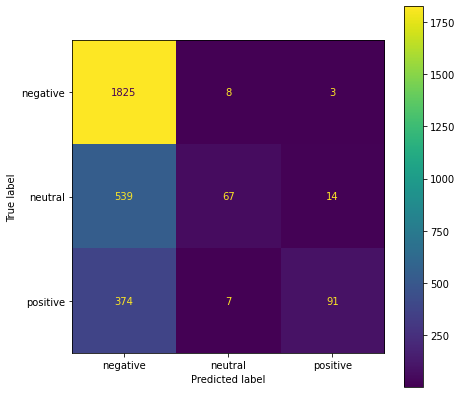

In [30]:
eval2(nb, X_test_count)

In [31]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.678621
train_accuracy         0.694274
test_precision-neg     0.667210
train_precision-neg    0.677164
test_recall-neg        0.994688
train_recall-neg       0.995884
test_f1-neg            0.798675
train_f1-neg           0.806165
dtype: float64

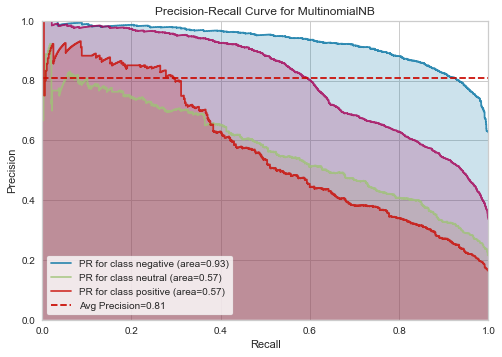

In [32]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=10),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [33]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_AP_neg = viz.score_["negative"]

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [35]:
print("LOG MODEL")
eval1(log, X_train_count, X_test_count)

LOG MODEL
[[1773   26   37]
 [ 406  175   39]
 [ 210   31  231]]
Test_Set
              precision    recall  f1-score   support

    negative       0.74      0.97      0.84      1836
     neutral       0.75      0.28      0.41       620
    positive       0.75      0.49      0.59       472

    accuracy                           0.74      2928
   macro avg       0.75      0.58      0.61      2928
weighted avg       0.75      0.74      0.71      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.76      0.97      0.86      7342
     neutral       0.81      0.35      0.49      2479
    positive       0.81      0.54      0.65      1891

    accuracy                           0.77     11712
   macro avg       0.79      0.62      0.66     11712
weighted avg       0.78      0.77      0.74     11712



              precision    recall  f1-score   support

    negative       0.74      0.97      0.84      1836
     neutral       0.75      0.28      0.41       620
    positive       0.75      0.49      0.59       472

    accuracy                           0.74      2928
   macro avg       0.75      0.58      0.61      2928
weighted avg       0.75      0.74      0.71      2928



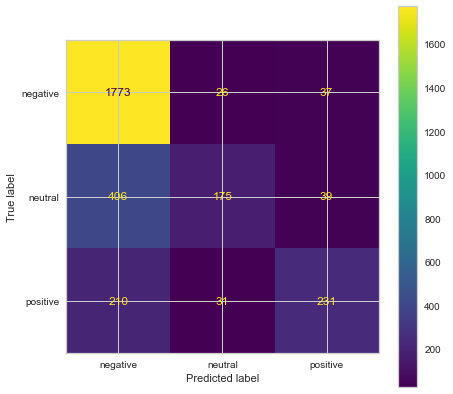

In [36]:
eval2(log, X_test_count)

In [37]:
model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.738217
train_accuracy         0.766953
test_precision-neg     0.736116
train_precision-neg    0.756915
test_recall-neg        0.965813
train_recall-neg       0.975423
test_f1-neg            0.835423
train_f1-neg           0.852387
dtype: float64

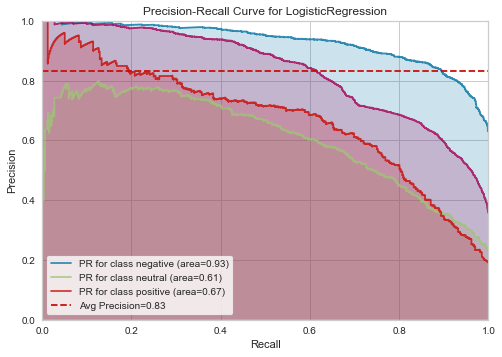

In [38]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1",
    fill_area=True
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [39]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_AP_neg = viz.score_["negative"]

In [40]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [41]:
print("LOG MODEL BALANCED")
eval1(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[1339  388  109]
 [  82  482   56]
 [  51  106  315]]
Test_Set
              precision    recall  f1-score   support

    negative       0.91      0.73      0.81      1836
     neutral       0.49      0.78      0.60       620
    positive       0.66      0.67      0.66       472

    accuracy                           0.73      2928
   macro avg       0.69      0.72      0.69      2928
weighted avg       0.78      0.73      0.74      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.74      0.83      7342
     neutral       0.52      0.80      0.63      2479
    positive       0.70      0.76      0.73      1891

    accuracy                           0.76     11712
   macro avg       0.72      0.77      0.73     11712
weighted avg       0.81      0.76      0.77     11712



## SVM

In [42]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [43]:
print("SVC MODEL")
eval1(svc, X_train_count, X_test_count)

SVC MODEL
[[1733   56   47]
 [ 322  252   46]
 [ 142   51  279]]
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      1836
     neutral       0.70      0.41      0.51       620
    positive       0.75      0.59      0.66       472

    accuracy                           0.77      2928
   macro avg       0.75      0.65      0.68      2928
weighted avg       0.76      0.77      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.84      0.97      0.90      7342
     neutral       0.82      0.56      0.67      2479
    positive       0.84      0.68      0.75      1891

    accuracy                           0.84     11712
   macro avg       0.83      0.74      0.77     11712
weighted avg       0.83      0.84      0.83     11712



In [44]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.772882
train_accuracy         0.833352
test_precision-neg     0.789103
train_precision-neg    0.833298
test_recall-neg        0.940616
train_recall-neg       0.969339
test_f1-neg            0.858155
train_f1-neg           0.896184
dtype: float64

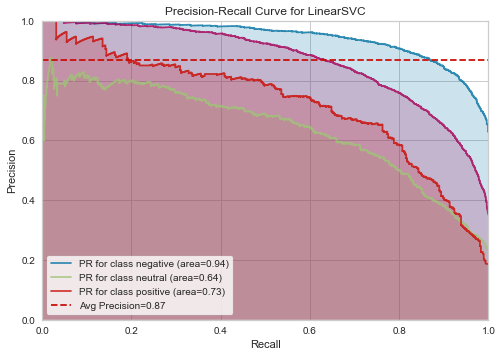

In [45]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [46]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_AP_neg = viz.score_["negative"]

## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

In [48]:
print("KNN MODEL")
eval1(knn, X_train_count, X_test_count)

KNN MODEL
[[779 963  94]
 [ 75 487  58]
 [ 42 209 221]]
Test_Set
              precision    recall  f1-score   support

    negative       0.87      0.42      0.57      1836
     neutral       0.29      0.79      0.43       620
    positive       0.59      0.47      0.52       472

    accuracy                           0.51      2928
   macro avg       0.59      0.56      0.51      2928
weighted avg       0.70      0.51      0.53      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.92      0.57      0.71      7342
     neutral       0.37      0.84      0.52      2479
    positive       0.70      0.56      0.62      1891

    accuracy                           0.63     11712
   macro avg       0.66      0.66      0.62     11712
weighted avg       0.77      0.63      0.65     11712



In [49]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.506919
train_accuracy         0.621917
test_precision-neg     0.857686
train_precision-neg    0.913329
test_recall-neg        0.418013
train_recall-neg       0.564424
test_f1-neg            0.561793
train_f1-neg           0.697529
dtype: float64

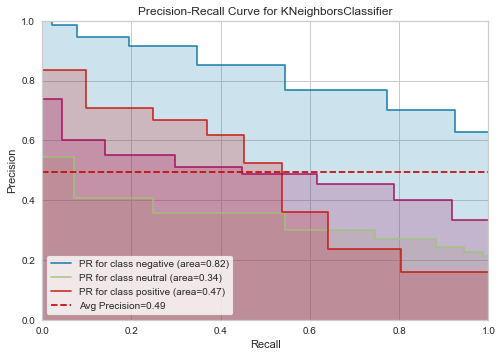

In [50]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)

viz.show();

In [51]:
y_pred = knn.predict(X_test_count)
knn_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_AP_neg = viz.score_["negative"]

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(200, random_state = 4299, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=4299)

In [53]:
print("RF MODEL")
eval(rf, X_test_count)

RF MODEL


TypeError: globals must be a real dict; try eval(expr, {}, mapping)

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42)
ada.fit(X_train_count, y_train)

In [ ]:
print("Ada MODEL")
eval(ada, X_test_count)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=2, ngram_range=(1,2))
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

## Model Comparisons  TF-IDF

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

In [ ]:
print("NB MODEL")
eval(nb, X_test_tf_idf)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tf_idf,y_train)

In [ ]:
print("LOG MODEL")
eval(log, X_test_tf_idf)

## SVM

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tf_idf,y_train)

In [ ]:
print("SVC MODEL")
eval(svc, X_test_tf_idf)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tf_idf,y_train)

In [ ]:
print("KNN MODEL")
eval(knn, X_test_tf_idf)

## RandomForest

In [ ]:
rf = RandomForestClassifier(200, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

In [ ]:
print("RF MODEL")
eval(rf, X_test_tf_idf)

## Ada Boost

In [ ]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

In [ ]:
print("Ada MODEL")
eval(ada, X_test_tf_idf)


In [ ]:
def get_results_for_a_given_algorithm(estimator, X_train, y_train, X_test, y_test):

    model = estimator.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scr = f1_score(y_test, y_pred, average='weighted')
    print(f'{estimator} Evalaution Metrics \n')
    #eval(model, X_test)

    return f1_scr

In [ ]:
classifiers = [AdaBoostClassifier(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=8)]
score_df = pd.DataFrame()
for idx, classifier in enumerate(classifiers):
    f1 = get_results_for_a_given_algorithm(classifier, X_train_tf_idf, y_train, X_test_tf_idf, y_test)
    score_df.loc[idx, 'model'] = str(classifier).split('(')[0]
    score_df.loc[idx, 'f1_score'] = f1

In [ ]:
score_df.sort_values(by='f1_score', ascending=False)

## Cross Val

In [ ]:
classifier_names = [str(i).split('(')[0] for i in classifiers]
classifier_names

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-neg': make_scorer(precision_score, average='weighted', labels=["negative"]),
                 'recall-neg': make_scorer(recall_score, average='weighted', labels = ["negative"]),
                 'f1-neg': make_scorer(f1_score, average='weighted', labels = ["negative"]),
                 
                 'precision-neutral': make_scorer(precision_score, average='weighted', labels=["neutral"]),
                 'recall-neutral': make_scorer(recall_score, average='weighted', labels = ["neutral"]),
                 'f1-neutral': make_scorer(f1_score, average='weighted', labels = ["neutral"]),
                 
                 'precision-pos': make_scorer(precision_score, average='weighted', labels=["positive"]),
                 'recall-pos': make_scorer(recall_score, average='weighted', labels = ["positive"]),
                 'f1-pos': make_scorer(f1_score, average='weighted', labels = ["positive"]),
                 }

score_dict = dict() 
for idx, estimator in enumerate(classifier_names):
    score_list = []
    for i, j  in custom_scorer.items():
        model = classifiers[idx] #LogisticRegression(max_iter=1000)
        scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 5, scoring = j, n_jobs = -1).mean()
        print(f" {i} score : {scores}\n")
        score_list.append(scores)
    score_dict[estimator]  = score_list

In [ ]:
score_dict

In [ ]:
columns = []
for key in custom_scorer.keys():
    columns.append(key)

In [ ]:
score_df = pd.DataFrame([score_dict])
score_df = score_df.T
score_df.rename(columns={0:'score'}, inplace=True)
score_df

In [ ]:
score_df = pd.DataFrame(score_df['score'].tolist(), columns=columns)
score_df.index = classifier_names
score_df

## For New Tweets, prediction with pipeline


In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=2, ngram_range=(1,2))),
                 ('log',LogisticRegression(max_iter=1000))])

In [ ]:
df3 = df.copy()
df3 = df3[['airline_sentiment', 'text']]
df3.rename(columns={'airline_sentiment':'sentiment'}, inplace=True)

In [ ]:
df3.sample()

In [ ]:
pipe.fit(df3["text"], df3["sentiment"])

In [ ]:
tweet = "it was the worst flight i have ever been" # data should be either pd.Series or list
tweet = pd.Series(tweet).apply(cleaning)


In [ ]:
tweet

In [ ]:
pipe.predict(tweet)[0]

In [ ]:
pipe.predict(tweet)

In [ ]:
tweet = "don't enjoy flight  at all"
tweet = pd.Series(tweet).apply(cleaning)
tweet

In [ ]:
pipe.predict(tweet)[0]

In [ ]:
tweet = "ok flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

In [ ]:
tweet = "it was amazing"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

In [ ]:
results = pipe.predict(["ok", "I really liked the customer service"])
for idx, result in enumerate(results):
    print(f'{idx+1}. sentiment is', result)

## WordCloud - Repetition of Words

In [ ]:
tweets = df3["text"]
tweets

In [ ]:
all_words = " ".join(tweets)

In [ ]:
all_words

In [ ]:
all_words[:100]

## Collect Words

In [ ]:
from wordcloud import WordCloud

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# create a mask based on the image we wish to include
# create a wordcloud 
wc = WordCloud(background_color='white',
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               max_font_size=256,
               contour_color='black',
               stopwords=stop_words)

## Create Word Cloud

In [ ]:
wc.generate(all_words)
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8), dpi =150)
plt.imshow(wc)
plt.axis("off")
plt.title('USA Airline Tweets', fontsize=13)
plt.show();

## Counting words

In [ ]:
counter = Counter(word_tokenize(all_words))

In [ ]:
counter.most_common(50)

In [ ]:
!pip install zeugma

In [ ]:
from zeugma.embeddings import EmbeddingTransformer

glove = EmbeddingTransformer('glove')

In [ ]:
df3['text'].sample()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3['text'], df3['sentiment'], test_size=0.2, stratify=y, random_state=4299)

In [ ]:
import numpy as np
X_train_v = glove.transform(np.array(X_train))

X_train_v

In [ ]:
X_train_v.shape

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_v, y_train)

In [ ]:
X_test_v = glove.transform(X_test)
model.predict(X_test_v)

In [ ]:
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, X_test, y_test, ax = ax, values_format = '.0f')

In [ ]:
eval(model, X_test_v)

In [ ]:
df3['clean_text'] = df3['text'].apply(cleaning)
X_train, X_test, y_train, y_test = train_test_split(df3['clean_text'], df3['sentiment'], test_size=0.2, stratify=y, random_state=4299)

In [ ]:
model = LogisticRegression(max_iter=1000)
X_train_v = glove.transform(np.array(X_train))
model.fit(X_train_v, y_train)
X_test_v = glove.transform(X_test)
eval(model, X_test_v)

In [ ]:
import gensim
glove_vectors = gensim.downloader.load('glove-twitter-100')

In [ ]:
glove_vectors.most_similar('flight')

In [ ]:
glove_vectors.most_similar('customer')